In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from numpy import zeros, linspace
%matplotlib nbagg

<IPython.core.display.Javascript object>


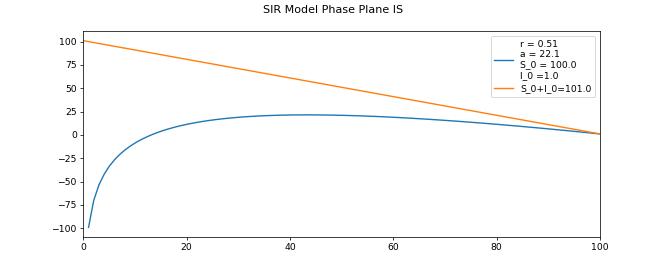

interactive(children=(FloatSlider(value=0.01, description='r:', max=2.0, min=0.01), FloatSlider(value=1.0, des…

In [10]:
import sys
x = np.linspace(0, 100,100)
fig,ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('SIR Model Phase Plane IS')
def update_plot(rate_r, rate_a, sucep_0, infect_0): 
    ax.clear()
    y = -x+(rate_a/rate_r)*np.log(x)+sucep_0+infect_0-(rate_a/rate_r)*np.log(sucep_0)
    y1= -x+sucep_0+infect_0
    units = 'r = {}  \na = {} \nS_0 = {} \nI_0 ={}'
    units1= 'S_0+I_0={}'
    ax.plot(x, y, label=units.format(rate_r, rate_a, sucep_0, infect_0))
    ax.plot(x,y1,label=units1.format(sucep_0+infect_0))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    print(rate_a/rate_r)
    plt.show()

rate_r = widgets.FloatSlider(min=0.01, max=2, value=0.01, description='r:')
rate_a= widgets.FloatSlider(min=1, max=100, value=1, description='a:')
sucep_0 = widgets.FloatSlider(min=1, max=100, value=1, description='S_0:')
infect_0 = widgets.FloatSlider(min=1, max=100, value=1, description='I_0:') 
widgets.interactive(update_plot, rate_r=rate_r, rate_a=rate_a, sucep_0=sucep_0, infect_0=infect_0)

<IPython.core.display.Javascript object>


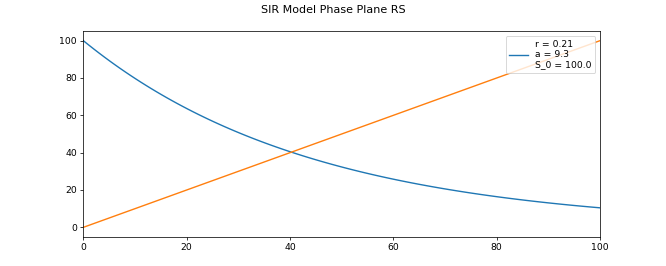

interactive(children=(FloatSlider(value=0.01, description='r:', max=2.0, min=0.01), FloatSlider(value=1.0, des…

In [12]:
x = np.linspace(0, 100,100)
fig,ax = plt.subplots(1, figsize=(10, 4))

plt.suptitle('SIR Model Phase Plane RS')
def update_plot(rate_r, rate_a, sucep_0): 
    ax.clear()
    y = sucep_0*np.exp(-x*(rate_r/rate_a))
    units = 'r = {}  \na = {} \nS_0 = {}'
    ax.plot(x, y,label=units.format(rate_r, rate_a, sucep_0))
    ax.plot(x,x)
    #plt.plot(x,x)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    print(rate_a/rate_r)
    plt.show()
rate_r = widgets.FloatSlider(min=0.01, max=2, value=0.01, description='r:')
rate_a= widgets.FloatSlider(min=1, max=100, value=0, description='a:')
sucep_0 = widgets.FloatSlider(min=1, max=100, value=1, description='S_0:')
widgets.interactive(update_plot, rate_r=rate_r, rate_a=rate_a, sucep_0=sucep_0)

<IPython.core.display.Javascript object>


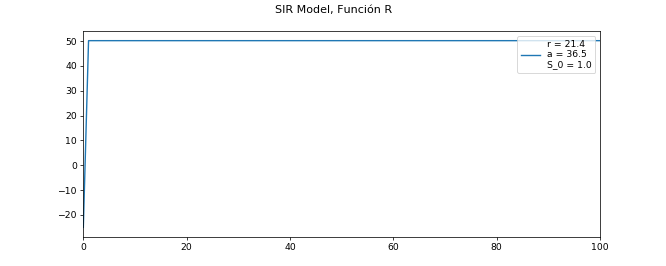

interactive(children=(FloatSlider(value=1.0, description='r:', min=1.0), FloatSlider(value=1.0, description='a…

In [13]:
x = np.linspace(0, 100,100)
fig,ax = plt.subplots(1, figsize=(10, 4))

plt.suptitle('SIR Model, Función R')
def update_plot(rate_r, rate_a, sucep_0, infect_0): 
    ax.clear()
    N= sucep_0+infect_0
    rho = rate_a/rate_r
    alpha= np.sqrt(((sucep_0/rho-1**2+(2*sucep_0*(infect_0)/rho**2))))
    phi_0= np.arctanh(sucep_0/rho-1)/alpha
    y = (rate_r**2/sucep_0)*((sucep_0/rho-1)+alpha*np.tanh(alpha*rate_a*x/2-phi_0))
    units = 'r = {}  \na = {} \nS_0 = {}'
    ax.plot(x, y,label=units.format(rate_r, rate_a, sucep_0))
    #plt.plot(x,x)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    plt.show()

rate_r = widgets.FloatSlider(min=1, max=100, value=1, description='r:')
rate_a= widgets.FloatSlider(min=1, max=100, value=0, description='a:')
sucep_0 = widgets.FloatSlider(min=1, max=100, value=1, description='S_0:')
infect_0 = widgets.FloatSlider(min=1, max=100, value=1, description='I_0:')
widgets.interactive(update_plot, rate_r=rate_r, rate_a=rate_a, sucep_0=sucep_0, infect_0= infect_0)

<IPython.core.display.Javascript object>


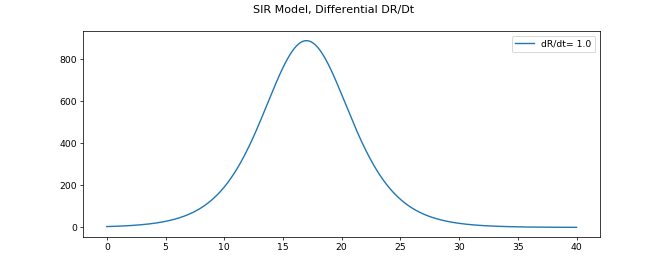

interactive(children=(FloatSlider(value=1.0, description='dR/dt:', min=1.0), Output()), _dom_classes=('widget-…

In [14]:
t = np.linspace(0, 40,1000)
fig,ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('SIR Model, Differential DR/Dt')
def update_plot(dRdt): 
    ax.clear()
    y = -dRdt+890*(np.cosh(0.2*t-3.4))**(-2)
    units = 'dR/dt= {}'
    ax.plot(t, y,label=units.format(dRdt))
    ax.legend(loc=1)
    plt.show()
dRdt = widgets.FloatSlider(min=1, max=100, value=0.1, description='dR/dt:')
widgets.interactive(update_plot,dRdt=dRdt)

<IPython.core.display.Javascript object>


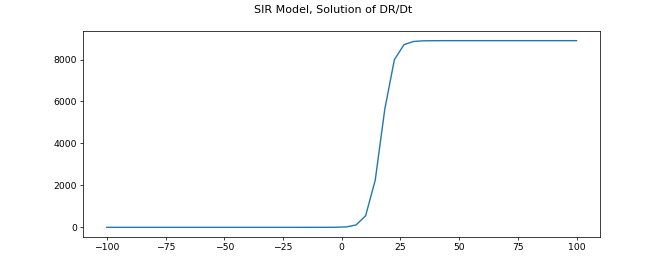

In [15]:
t = np.linspace(-100,100)
fig,ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('SIR Model, Solution of DR/Dt')
def Equation_DR(y,t):
    dydt =890*(np.cosh(0.2*t-3.4))**(-2)
    return dydt
# solve ODE
R_0=0
y = odeint(Equation_DR,R_0,t)
# plot results
ax.plot(t,y)
plt.show()

<IPython.core.display.Javascript object>


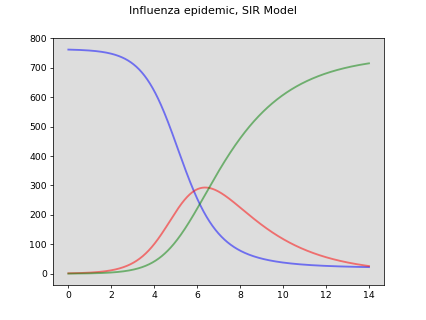

In [16]:
N = 763
I0, R0 = 1, 0
S0 = N - I0 - R0
beta = 0.00218
gamma = 0.44036
t = np.linspace(0, 14, 1000)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I 
    dIdt = beta * S * I  - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
fig = plt.figure(facecolor='w')
plt.suptitle('Influenza epidemic, SIR Model')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.show()

<IPython.core.display.Javascript object>


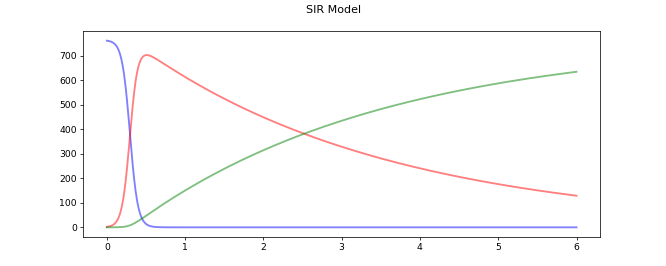

interactive(children=(FloatSlider(value=1.0, description='N:', max=763.0), FloatSlider(value=0.0, description=…

In [17]:
t = np.linspace(0, 6, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('SIR Model')
def update_plot(N,beta,gamma,I0,R0):
    ax.clear()
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I 
        dIdt = beta * S * I  - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    S0=N-I0-R0
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    plt.show()

N = widgets.FloatSlider(min=0, max=763, value=1, description='N:')
beta= widgets.FloatSlider(min=0.0000,max=1.0000,step=0.0001, description='beta:')
gamma = widgets.FloatSlider(min=0.0000,max=1.0000,step=0.0001, description='gamma')
I0=  widgets.FloatSlider(min=1, max=10, value=1, description='I0')
R0=  widgets.FloatSlider(min=0, max=10, value=0, description='R0')
widgets.interactive(update_plot, N=N, beta=beta, gamma=gamma, I0=I0,R0=R0)

<IPython.core.display.Javascript object>


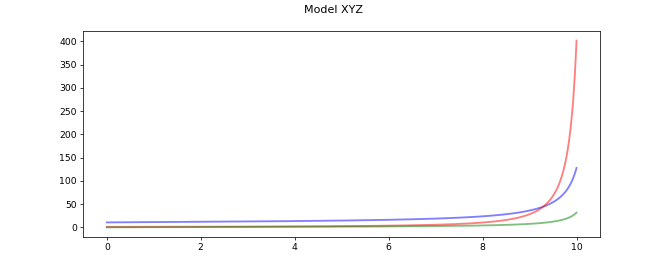

interactive(children=(FloatSlider(value=1.0, description='N:', max=1000.0), FloatSlider(value=0.01, descriptio…

In [22]:
t = np.linspace(0, 10, 10000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Model XYZ')
def update_plot(N,beta,rate_b,rate_r,Y0,Z0):
    ax.clear()
    def deriv(y, t, N, beta, rate_b, rate_r):
        X,Y,Z= y
        dXdt = rate_b*N-beta*X+Y-rate_b*X
        dYdt = beta *X*Y- (rate_b+rate_r)*Y
        dZdt = rate_r*Y-rate_b*Z
        return dXdt, dYdt, dZdt
    X0=N-Y0-Z0
    y0 = X0, Y0, Z0
    ret = odeint(deriv, y0, t, args=(N, beta, rate_b, rate_r))
    X,Y,Z = ret.T
    ax.plot(t, X, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, Y, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, Z, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    print((rate_b+rate_r)/beta)
    plt.show()

N = widgets.FloatSlider(min=0, max=1000, value=1, description='N:')
beta= widgets.FloatSlider(min=0.01,max=0.050,step=0.0001, description='beta:')
rate_b= widgets.FloatSlider(min=0.0000,max=0.50,step=0.0001, description='b')
rate_r= widgets.FloatSlider(min=0.0000,max=0.50,step=0.0001, description='r')
Y0=  widgets.FloatSlider(min=1, max=10, value=1, description='Y0')
Z0=  widgets.FloatSlider(min=0, max=10, value=0, description='Z0')
widgets.interactive(update_plot, N=N, beta=beta, rate_r=rate_r, rate_b=rate_b, Y0=Y0,Z0=Z0)